<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Parcial_3/Escape_foton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4. (Tiempo de escape de un fotón del sol)** Un fotón ($\gamma$) se crea por procesos de fusión en el centro del sol. Vamos a estimar el tiempo medio que tarda en escapar, usando un modelo de caminata aleatoria en 3D. Considere el camino libre medio del fotón $\textit{l}=0.1$ y el radio del sol $R_s=1$ (en algún sistema de unidades). Genere una caminata aleatoria en coordenadas esféricas para estimar el número promedio de pasos que le toma al fotón escapar del sol. Recuerde lo siguiente:

$x_{i+1}\ =\ x_i + \textit{l}sin \theta cos\phi$

$y_{i+1}\ =\ y_i + \textit{l}sin \theta sin\phi$

$z_{i+1}\ =\ z_i + \textit{l}cos \theta$

El dominio de las variables angulares son $\theta \in [0,\pi]$ y $\phi \in [0,2\pi]$


(a) Genere N=1000 fotones aleatorios y retorne cuántos pasos le toma salir al fotón desde el centro del sol (i.e, $\sqrt{x^2 +y^2 +z^2} > r$ termina el ciclo)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib


N = 1000
Rs = 1
l = 0.1
pasos_para_escapar = []

for _ in range(N):
    x, y, z = 0, 0, 0
    pasos = 0
    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)
        pasos += 1
    pasos_para_escapar.append(pasos)

pasos_para_escapar = np.array(pasos_para_escapar)


(b) Elija una distribución de clases que tenga su valor mínimo y su máximo, en el mínimo y máximo de la distribución de pasos. Use n=20 clases.

(c) Construya la distribución de frecuencias y normalice correctamente a la unidad.

In [2]:
import numpy as np

n_bins_foton = 20
hist_foton, bin_edges_foton = np.histogram(pasos_para_escapar, bins=n_bins_foton, density=False)
bin_centers_foton = (bin_edges_foton[:-1] + bin_edges_foton[1:]) / 2

min_bin_foton = np.min(bin_centers_foton)
max_bin_foton = np.max(bin_centers_foton)


print("Mínimo de los centros de los bins:", min_bin_foton)
print("Máximo de los centros de los bins:", max_bin_foton)

Mínimo de los centros de los bins: 30.075
Máximo de los centros de los bins: 488.92499999999995


In [3]:
frequencies_foton = hist_foton / np.sum(hist_foton)

(d) Dibuje la distribución de frecuencias usando los métodos de clase.

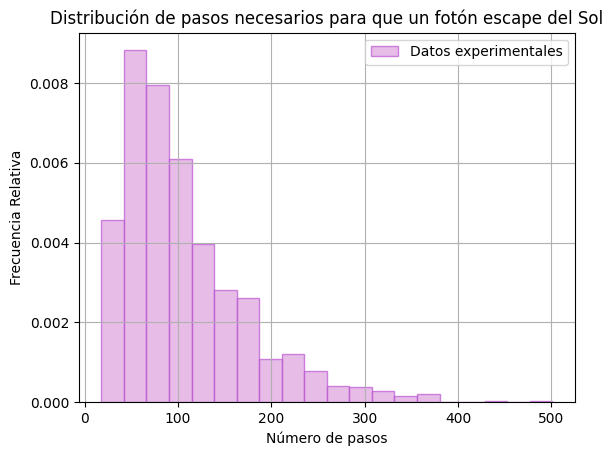

In [4]:
plt.hist(pasos_para_escapar, bins=n_bins_foton, density=True, color='plum', edgecolor='mediumorchid', alpha=0.7, label="Datos experimentales")
plt.ylabel("Frecuencia Relativa")
plt.xlabel("Número de pasos")
plt.legend()
plt.title('Distribución de pasos necesarios para que un fotón escape del Sol')
plt.grid(True)
plt.show()


(e) Calcule el valor esperado del número de pasos que le toma al fotón escapar: $\mathbb{E}= \sum^{n}_{i=1} H_i m_i$, donde $H_i$ es el valor de la frecuencia relativa y $m_i$ es la marca de clase.

In [5]:
pasos_esperados=np.sum(frequencies_foton*bin_centers_foton)
print(f"Pasos esperados: {pasos_esperados}")

Pasos esperados: 106.53389999999997



(f) Verifique que el número medio de pasos medio es aproximadamente: $\mathbb{E} (n) \approx (R_s / \ \textit{l}\ )^2$

In [6]:
calculo_realista = (Rs / l)**2
print(f"Valor teórico esperado: {calculo_realista}")

Valor teórico esperado: 100.0


(g) (**Calculo realista:**) usando la relación anterior, se puede estimar el tiempo que le toma salir al fotón del sol. El tiempo entre dos choques a la velocidad de la luz es t$= \ \textit{l}\ /c$. Después de $N$ colisiones el tiempo medio de escape es: $\bar{T} = N \frac{\textit{l}}{c}= \frac{R_s^2}{\textit{l}c}$. Usando $R_s \approx 700000\ km,\ c\approx 300000\ km/s$ y $\textit{l} \approx 0.6 \ cm$. ¿Cuántos años le toma al fotón escapar?

In [7]:
Rs_km = 700000
c_km_s = 300000
l_km = 6e-6

T_seconds = (Rs_km**2) / (l_km * c_km_s)

T_years = T_seconds / (60 * 60 * 24 * 365)
print(f"Tiempo medio de escape: {T_years:.2f} años")

Tiempo medio de escape: 8632.11 años


(h) Realice un ajuste al histograma usando una distribución exponencial de Weibull: **a,c,d,e = exponweib.fit(distribution)** y posteriormente dibuje la distribución y el histograma.

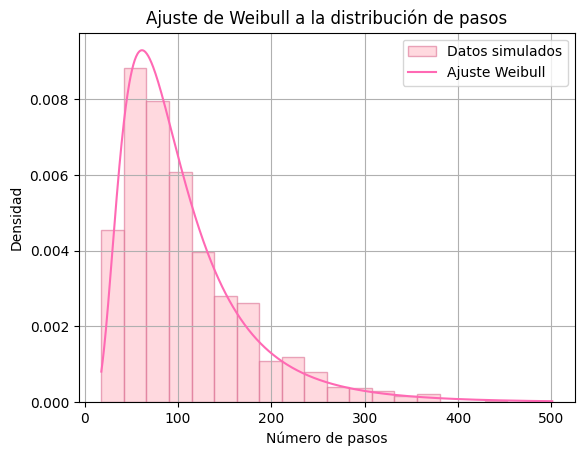

In [8]:
params = exponweib.fit(pasos_para_escapar, floc=0)
x = np.linspace(min(pasos_para_escapar), max(pasos_para_escapar), 1000)
pdf_fitted = exponweib.pdf(x, *params)


plt.hist(pasos_para_escapar, bins=n_bins_foton, density=True, alpha=0.6, color='pink',edgecolor='palevioletred', label='Datos simulados')
plt.plot(x, pdf_fitted, 'hotpink', label='Ajuste Weibull')
plt.xlabel('Número de pasos')
plt.ylabel('Densidad')
plt.legend()
plt.title('Ajuste de Weibull a la distribución de pasos')
plt.grid(True)
plt.show()

Generación 1: Mejor fitness = 16
Generación 2: Mejor fitness = 16
Generación 3: Mejor fitness = 16
Generación 4: Mejor fitness = 16
Generación 5: Mejor fitness = 13
Generación 6: Mejor fitness = 13
Generación 7: Mejor fitness = 13
Generación 8: Mejor fitness = 13
Generación 9: Mejor fitness = 13
Generación 10: Mejor fitness = 13
Generación 11: Mejor fitness = 13
Generación 12: Mejor fitness = 13
Generación 13: Mejor fitness = 13
Generación 14: Mejor fitness = 13
Generación 15: Mejor fitness = 13
Generación 16: Mejor fitness = 13
Generación 17: Mejor fitness = 13
Generación 18: Mejor fitness = 12
Generación 19: Mejor fitness = 12
Generación 20: Mejor fitness = 12
Generación 21: Mejor fitness = 12
Generación 22: Mejor fitness = 12
Generación 23: Mejor fitness = 12
Generación 24: Mejor fitness = 12
Generación 25: Mejor fitness = 12
Generación 26: Mejor fitness = 12
Generación 27: Mejor fitness = 12
Generación 28: Mejor fitness = 12
Generación 29: Mejor fitness = 12
Generación 30: Mejor fi

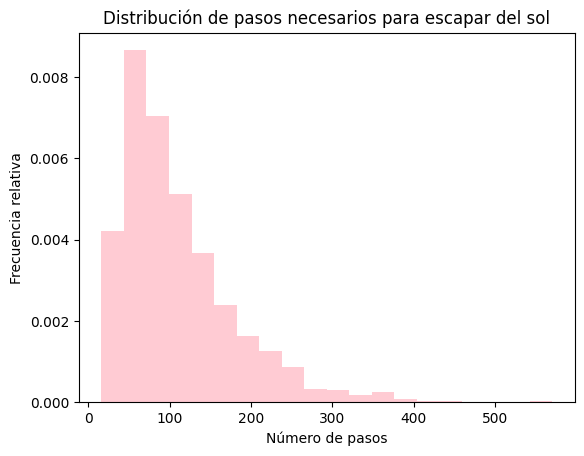

El valor esperado del número de pasos es: 109.285
Valor teórico del número esperado de pasos: 100.0
Valor calculado del número esperado de pasos: 109.285
El tiempo estimado para que un fotón escape del sol es: 8.63e+03 años


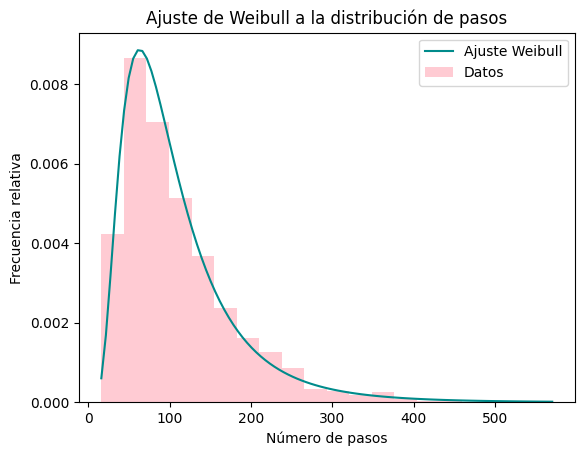

In [12]:
#Con clases
import random
class Photon:
    def __init__(self, max_steps=1000):
        self.path = [(np.random.uniform(0, np.pi), np.random.uniform(0, 2 * np.pi)) for _ in range(max_steps)]
        self.steps = max_steps

    def evaluate(self, l, Rs):

        x, y, z = 0, 0, 0
        for i, (theta, phi) in enumerate(self.path):
            x += l * np.sin(theta) * np.cos(phi)
            y += l * np.sin(theta) * np.sin(phi)
            z += l * np.cos(theta)
            if np.sqrt(x**2 + y**2 + z**2) > Rs:
                self.steps = i + 1
                return self.steps
        return self.steps


class Population:
    def __init__(self, size, max_steps=1000):
        self.photons = [Photon(max_steps) for _ in range(size)]
        self.size = size

    def evaluate(self, l, Rs):
        return [photon.evaluate(l, Rs) for photon in self.photons]

    def select_parents(self, fitnesses, k=3):
        selected = random.sample(list(zip(self.photons, fitnesses)), k)
        return min(selected, key=lambda x: x[1])[0]

    def crossover(self, parent1, parent2):
        split = random.randint(1, len(parent1.path) - 1)
        child_path = parent1.path[:split] + parent2.path[split:]
        return Photon(max_steps=len(child_path)), child_path

    def mutate(self, photon, mutation_rate):
        photon.path = [
            (np.random.uniform(0, np.pi), np.random.uniform(0, 2 * np.pi)) if random.random() < mutation_rate else step
            for step in photon.path
        ]
        return photon


class GeneticAlgorithm:

    def __init__(self, population_size, max_generations, mutation_rate, l, Rs, max_steps=1000):
        self.population = Population(population_size, max_steps)
        self.max_generations = max_generations
        self.mutation_rate = mutation_rate
        self.l = l
        self.Rs = Rs
        self.best_fitness = float('inf')
        self.best_photon = None

    def run(self):

        for generation in range(self.max_generations):
            fitnesses = self.population.evaluate(self.l, self.Rs)
            min_fitness = min(fitnesses)
            if min_fitness < self.best_fitness:
                self.best_fitness = min_fitness
                self.best_photon = self.population.photons[fitnesses.index(min_fitness)]
            print(f"Generación {generation + 1}: Mejor fitness = {self.best_fitness}")

            new_photons = []
            for _ in range(self.population.size // 2):
                parent1 = self.population.select_parents(fitnesses)
                parent2 = self.population.select_parents(fitnesses)
                child1 = self.population.mutate(self.population.crossover(parent1, parent2)[0], self.mutation_rate)
                child2 = self.population.mutate(self.population.crossover(parent2, parent1)[0], self.mutation_rate)
                new_photons.extend([child1, child2])

            self.population.photons = new_photons

        return self.best_fitness

population_size = 1000
max_generations = 50
mutation_rate = 0.1
l = 0.1
Rs = 1.0


ga = GeneticAlgorithm(population_size, max_generations, mutation_rate, l, Rs)
best_fitness = ga.run()

print(f"El número mínimo de pasos para escapar del sol es: {best_fitness}")

import matplotlib.pyplot as plt

fitnesses = ga.population.evaluate(l, Rs)

n_classes = 20
hist, bin_edges = np.histogram(fitnesses, bins=n_classes, density=True)

plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge", alpha=0.7, color="lightpink")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de pasos necesarios para escapar del sol")
plt.show()

class_marks = (bin_edges[:-1] + bin_edges[1:]) / 2

E = np.mean(fitnesses)
print(f"El valor esperado del número de pasos es: {E}")

theoretical_E = (Rs / l) ** 2
print(f"Valor teórico del número esperado de pasos: {theoretical_E}")
print(f"Valor calculado del número esperado de pasos: {E}")

Rs_km = 700000
l_cm = 0.6
c_km_per_s = 300000
l_km = l_cm / 100000

T_seconds = Rs_km**2 / (l_km * c_km_per_s)
T_years = T_seconds / (60 * 60 * 24 * 365.25)

print(f"El tiempo estimado para que un fotón escape del sol es: {T_years:.2e} años")

from scipy.stats import exponweib

params = exponweib.fit(fitnesses, floc=0)
a, c, loc, scale = params

x = np.linspace(min(fitnesses), max(fitnesses), 100)
pdf = exponweib.pdf(x, a, c, loc, scale)

plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge", alpha=0.7, label="Datos", color= "lightpink")
plt.plot(x, pdf, '-',color="darkcyan", label="Ajuste Weibull")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia relativa")
plt.title("Ajuste de Weibull a la distribución de pasos")
plt.legend()
plt.show()